In [1]:
from keras.preprocessing.text import Tokenizer

In [2]:
samples = [
    'The cat sat on the mat.',
    'The dog ate my homework.',
]

# creates a tokenizer, configured to only take into acocunt the
# 1000 most common words
tokenizer = Tokenizer(num_words=1000)
# build the word index
tokenizer.fit_on_texts(samples)

# turns strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index

In [3]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [5]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [4]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [6]:
from keras.datasets import imdb
from keras import preprocessing

In [9]:
max_features = 10000 # number of words to consider as features
maxlen = 20 # cuts off the text after this number of words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


# turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

2023-10-02 20:47:27.936106: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-02 20:47:27.936151: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-10-02 20:47:27.936164: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-10-02 20:47:27.936199: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-02 20:47:27.936220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10


2023-10-02 20:48:08.105004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 9s 12ms/step - loss: 0.6634 - accuracy: 0.6348 - val_loss: 0.6055 - val_accuracy: 0.6954
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5298 - accuracy: 0.7542 - val_loss: 0.5191 - val_accuracy: 0.7336
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.4565 - accuracy: 0.7883 - val_loss: 0.4971 - val_accuracy: 0.7492
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.4210 - accuracy: 0.8084 - val_loss: 0.4919 - val_accuracy: 0.7552
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3974 - accuracy: 0.8231 - val_loss: 0.4914 - val_accuracy: 0.7592
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3783 - accuracy: 0.8331 - val_loss: 0.4934 - val_accuracy: 0.7630
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.3619 - accuracy: 0.8439 - val_loss: 0.4997 - val_accuracy: 0.7574
Epoch 8/10

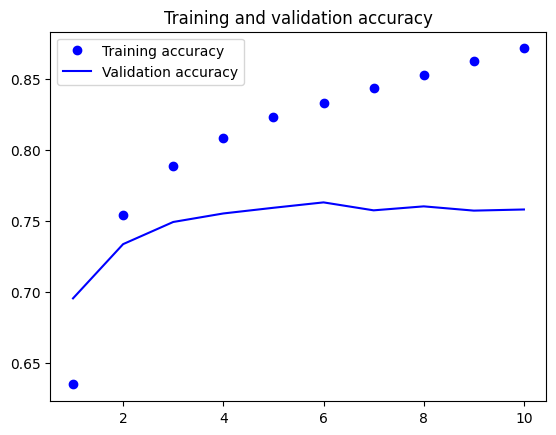

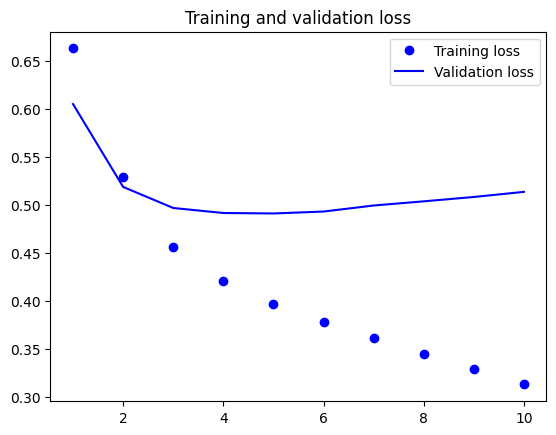

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()